In [5]:
#Task 1 a

import numpy as np
from scipy.special import gamma


m = 1.0  
omega = 1.0  

def phase_space_volume(E):
    """
    Compute the phase space volume \Omega(E) for a given energy E.

    Parameters:
    E (float): Energy of the system

    Returns:
    float: Phase space volume \Omega(E)
    """
    #dimensions of phase space 2 spatial + 2 momentum
    d = 4

    #coefficient for the 4D hyper-ellipsoid volume
    coeff = (np.pi**2) / (2 * m * omega**2)

    return coeff * (E**(d / 2))


def density_of_states(E):
    """
    Compute the density of states g(E).

    Parameters:
    E (float): Energy of the system

    Returns:
    float: Density of states g(E)
    """
    
    d = 4

    #derivative of phase space volume with respect to E
    coeff = (np.pi**2) / (2 * m * omega**2)

    return coeff * (d / 2) * (E**((d / 2) - 1))


if __name__ == "__main__":
    energies = np.linspace(0.1, 10, 10)  
    phase_volumes = [phase_space_volume(E) for E in energies]
    densities = [density_of_states(E) for E in energies]

    
    for E, Omega, g in zip(energies, phase_volumes, densities):
        print(f"E = {E:.2f}, \u03A9(E) = {Omega:.2f}, g(E) = {g:.2f}")


E = 0.10, Ω(E) = 0.05, g(E) = 0.99
E = 1.20, Ω(E) = 7.11, g(E) = 11.84
E = 2.30, Ω(E) = 26.11, g(E) = 22.70
E = 3.40, Ω(E) = 57.05, g(E) = 33.56
E = 4.50, Ω(E) = 99.93, g(E) = 44.41
E = 5.60, Ω(E) = 154.76, g(E) = 55.27
E = 6.70, Ω(E) = 221.52, g(E) = 66.13
E = 7.80, Ω(E) = 300.23, g(E) = 76.98
E = 8.90, Ω(E) = 390.89, g(E) = 87.84
E = 10.00, Ω(E) = 493.48, g(E) = 98.70


In [4]:
#task 1 b

import numpy as np


m = 1.0      
omega = 1.0  
hbar = 1.0   
k_B = 1.0    

#function Z(\u03B2)
def partition_function(beta):
    """
    Compute the classical partition function Z(\u03B2) for a 2D harmonic oscillator.

    Parameters:
    beta (float): Inverse temperature \u03B2 = 1 / (k_B * T)

    Returns:
    float: Canonical partition function Z(\u03B2)
    """
    #phase space integral
    prefactor = (2 * np.pi) / beta
    Z_beta = prefactor / (m * omega**2)

    return Z_beta


if __name__ == "__main__":
    temperatures = np.linspace(0.1, 10, 10)  
    betas = 1 / (k_B * temperatures)

    Z_values = [partition_function(beta) for beta in betas]

    
    for T, Z in zip(temperatures, Z_values):
        print(f"T = {T:.2f}, Z(\u03B2) = {Z:.2f}")


T = 0.10, Z(β) = 0.63
T = 1.20, Z(β) = 7.54
T = 2.30, Z(β) = 14.45
T = 3.40, Z(β) = 21.36
T = 4.50, Z(β) = 28.27
T = 5.60, Z(β) = 35.19
T = 6.70, Z(β) = 42.10
T = 7.80, Z(β) = 49.01
T = 8.90, Z(β) = 55.92
T = 10.00, Z(β) = 62.83


In [3]:
#Task 1 c 

import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve


m = 1.0       
omega = 1.0   
lambda_ = 0.1 


def effective_potential(r, m, omega, lambda_):
    return 0.5 * m * omega**2 * r**2 + lambda_ * r**4

def find_r_max(E, m, omega, lambda_):
    """
    Solve for the maximum radius r_max where H_q = E.

    Parameters:
    E (float): Energy level
    m, omega, lambda_ (float): System parameters

    Returns:
    float: Maximum radius r_max
    """
    func = lambda r: effective_potential(r, m, omega, lambda_) - E
    r_max = fsolve(func, np.sqrt(2 * E / (m * omega**2)))  
    #initial guess
    return r_max[0] if r_max[0] > 0 else 0


def phase_space_volume(E, m, omega, lambda_):
    """
    Compute the phase space volume \Omega(E).

    Parameters:
    E (float): Energy level
    m, omega, lambda_ (float): System parameters

    Returns:
    float: Phase space volume \Omega(E)
    """
    r_max = find_r_max(E, m, omega, lambda_)
    integrand = lambda r: r  #2D area element in polar 
    volume, _ = quad(integrand, 0, r_max)
    return (2 * np.pi)**2 * m * volume


def density_of_states(E, m, omega, lambda_):
    """
    Compute the density of states g(E).

    Parameters:
    E (float): Energy level
    m, omega, lambda_ (float): System parameters

    Returns:
    float: Density of states g(E)
    """
    delta_E = 1e-5
    omega_E_plus = phase_space_volume(E + delta_E, m, omega, lambda_)
    omega_E_minus = phase_space_volume(E - delta_E, m, omega, lambda_)
    return (omega_E_plus - omega_E_minus) / (2 * delta_E)


if __name__ == "__main__":
    energies = np.linspace(0.1, 10, 10)
    g_values = [density_of_states(E, m, omega, lambda_) for E in energies]

    
    for E, g in zip(energies, g_values):
        print(f"E = {E:.2f}, g(E) = {g:.2f}")


E = 0.10, g(E) = 36.65
E = 1.20, g(E) = 23.10
E = 2.30, g(E) = 18.25
E = 3.40, g(E) = 15.56
E = 4.50, g(E) = 13.79
E = 5.60, g(E) = 12.51
E = 6.70, g(E) = 11.53
E = 7.80, g(E) = 10.75
E = 8.90, g(E) = 10.11
E = 10.00, g(E) = 9.57


In [6]:
#Task 2 a

import sympy as sp

m1, m2 = sp.symbols('m1 m2')  
L1, L2 = sp.symbols('L1 L2')  
g = sp.symbols('g')           
theta1, theta2 = sp.symbols('theta1 theta2')  
dtheta1, dtheta2 = sp.symbols('dtheta1 dtheta2')  

#positions of the masses in Cartesian coordinates
x1 = L1 * sp.sin(theta1)
y1 = -L1 * sp.cos(theta1)

x2 = x1 + L2 * sp.sin(theta2)
y2 = y1 - L2 * sp.cos(theta2)

#velocities 
v1x = sp.diff(x1, theta1) * dtheta1
v1y = sp.diff(y1, theta1) * dtheta1

v2x = sp.diff(x2, theta1) * dtheta1 + sp.diff(x2, theta2) * dtheta2
v2y = sp.diff(y2, theta1) * dtheta1 + sp.diff(y2, theta2) * dtheta2

#kinetic energy
T1 = (1/2) * m1 * (v1x**2 + v1y**2)
T2 = (1/2) * m2 * (v2x**2 + v2y**2)
T = T1 + T2

#potential energy
V1 = m1 * g * y1
V2 = m2 * g * y2
V = V1 + V2

#lagrangian
L = T - V

#generalized coordinates 
q = sp.Matrix([theta1, theta2])
dq = sp.Matrix([dtheta1, dtheta2])

#compute Lagrange's equations 
partials_dq = sp.Matrix([sp.diff(L, dtheta1), sp.diff(L, dtheta2)])
partials_q = sp.Matrix([sp.diff(L, theta1), sp.diff(L, theta2)])

ddt_partials_dq = sp.Matrix([sp.diff(partials_dq[0], theta1) * dtheta1 + sp.diff(partials_dq[0], theta2) * dtheta2,
                             sp.diff(partials_dq[1], theta1) * dtheta1 + sp.diff(partials_dq[1], theta2) * dtheta2])

#equations of motion
EOM = ddt_partials_dq - partials_q


EOM_simplified = sp.simplify(EOM)

#mass matrix M 
M = EOM.jacobian(dq)
F = EOM - M * dq


print("Lagrangian:")
sp.pprint(L)

print("\nEquations of Motion:")
sp.pprint(EOM_simplified)

print("\nMass Matrix M:")
sp.pprint(M)

print("\nForcing Vector F:")
sp.pprint(F)


Lagrangian:
                                                           ⎛  2        2    2  ↪
L₁⋅g⋅m₁⋅cos(θ₁) - g⋅m₂⋅(-L₁⋅cos(θ₁) - L₂⋅cos(θ₂)) + 0.5⋅m₁⋅⎝L₁ ⋅dtheta₁ ⋅sin ( ↪

↪         2        2    2    ⎞          ⎛                                      ↪
↪ θ₁) + L₁ ⋅dtheta₁ ⋅cos (θ₁)⎠ + 0.5⋅m₂⋅⎝(L₁⋅dtheta₁⋅sin(θ₁) + L₂⋅dtheta₂⋅sin( ↪

↪     2                                            2⎞
↪ θ₂))  + (L₁⋅dtheta₁⋅cos(θ₁) + L₂⋅dtheta₂⋅cos(θ₂)) ⎠

Equations of Motion:
⎡   ⎛              2                                              ⎞⎤
⎢L₁⋅⎝1.0⋅L₂⋅dtheta₂ ⋅m₂⋅sin(θ₁ - θ₂) + g⋅m₁⋅sin(θ₁) + g⋅m₂⋅sin(θ₁)⎠⎥
⎢                                                                  ⎥
⎢              ⎛                2                         ⎞        ⎥
⎣        L₂⋅m₂⋅⎝- 1.0⋅L₁⋅dtheta₁ ⋅sin(θ₁ - θ₂) + g⋅sin(θ₂)⎠        ⎦

Mass Matrix M:
⎡                                                                              ↪
⎢                                                                              ↪
⎣0.5⋅dthe

In [8]:
#task 2 b
import sympy as sp


m1, m2 = sp.symbols('m1 m2')  
L1, L2 = sp.symbols('L1 L2')  
g = sp.symbols('g')           
theta1, theta2 = sp.symbols('theta1 theta2')  
dtheta1, dtheta2 = sp.symbols('dtheta1 dtheta2')  


x1 = L1 * sp.sin(theta1)
y1 = -L1 * sp.cos(theta1)

x2 = x1 + L2 * sp.sin(theta2)
y2 = y1 - L2 * sp.cos(theta2)


v1x = sp.diff(x1, theta1) * dtheta1
v1y = sp.diff(y1, theta1) * dtheta1

v2x = sp.diff(x2, theta1) * dtheta1 + sp.diff(x2, theta2) * dtheta2
v2y = sp.diff(y2, theta1) * dtheta1 + sp.diff(y2, theta2) * dtheta2


T1 = (1/2) * m1 * (v1x**2 + v1y**2)
T2 = (1/2) * m2 * (v2x**2 + v2y**2)
T = T1 + T2


V1 = m1 * g * y1
V2 = m2 * g * y2
V = V1 + V2


L = T - V

#generalized coordinates 
q = sp.Matrix([theta1, theta2])
dq = sp.Matrix([dtheta1, dtheta2])

#generalized momenta 
p = sp.Matrix([sp.diff(L, dtheta1), sp.diff(L, dtheta2)])


H = p.dot(dq) - L

#Hamiltonian in terms of q and p
H_expanded = H.expand()


H_simplified = sp.simplify(H_expanded)

#mass matrix and its inverse
partials_dq = sp.Matrix([sp.diff(L, dtheta1), sp.diff(L, dtheta2)])
M = partials_dq.jacobian(dq)
M_inv = sp.simplify(M.inv())

#write Hamiltonian in matrix form
H_matrix = (1/2) * (p.T * M_inv * p)[0] + V

print("Generalized Momenta p:")
sp.pprint(p)

print("\nHamiltonian H:")
sp.pprint(H_simplified)

print("\nMass Matrix M:")
sp.pprint(M)

print("\nHamiltonian in Matrix Form:")
sp.pprint(H_matrix)


Generalized Momenta p:
⎡       ⎛    2            2           2            2    ⎞                      ↪
⎢0.5⋅m₁⋅⎝2⋅L₁ ⋅dtheta₁⋅sin (θ₁) + 2⋅L₁ ⋅dtheta₁⋅cos (θ₁)⎠ + 0.5⋅m₂⋅(2⋅L₁⋅(L₁⋅d ↪
⎢                                                                              ↪
⎣                             0.5⋅m₂⋅(2⋅L₂⋅(L₁⋅dtheta₁⋅sin(θ₁) + L₂⋅dtheta₂⋅si ↪

↪                                                                              ↪
↪ theta₁⋅sin(θ₁) + L₂⋅dtheta₂⋅sin(θ₂))⋅sin(θ₁) + 2⋅L₁⋅(L₁⋅dtheta₁⋅cos(θ₁) + L₂ ↪
↪                                                                              ↪
↪ n(θ₂))⋅sin(θ₂) + 2⋅L₂⋅(L₁⋅dtheta₁⋅cos(θ₁) + L₂⋅dtheta₂⋅cos(θ₂))⋅cos(θ₂))     ↪

↪                           ⎤
↪ ⋅dtheta₂⋅cos(θ₂))⋅cos(θ₁))⎥
↪                           ⎥
↪                           ⎦

Hamiltonian H:
      2        2            2        2                                         ↪
0.5⋅L₁ ⋅dtheta₁ ⋅m₁ + 0.5⋅L₁ ⋅dtheta₁ ⋅m₂ + 1.0⋅L₁⋅L₂⋅dtheta₁⋅dtheta₂⋅m₂⋅cos(θ ↪

↪                           

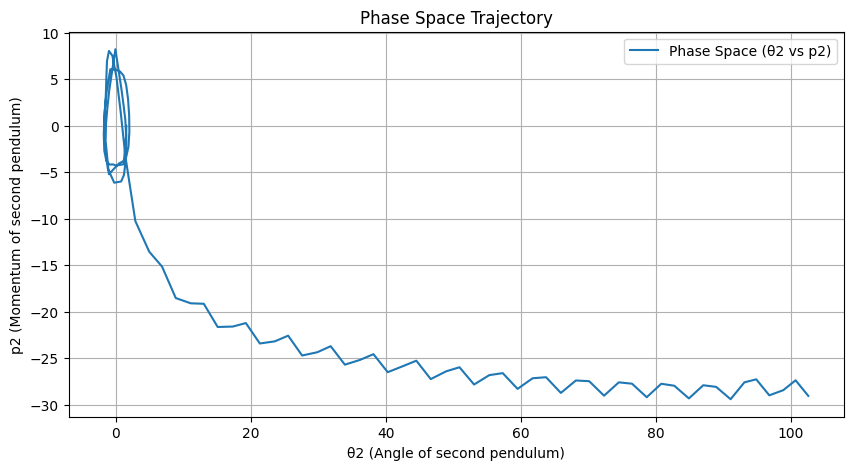

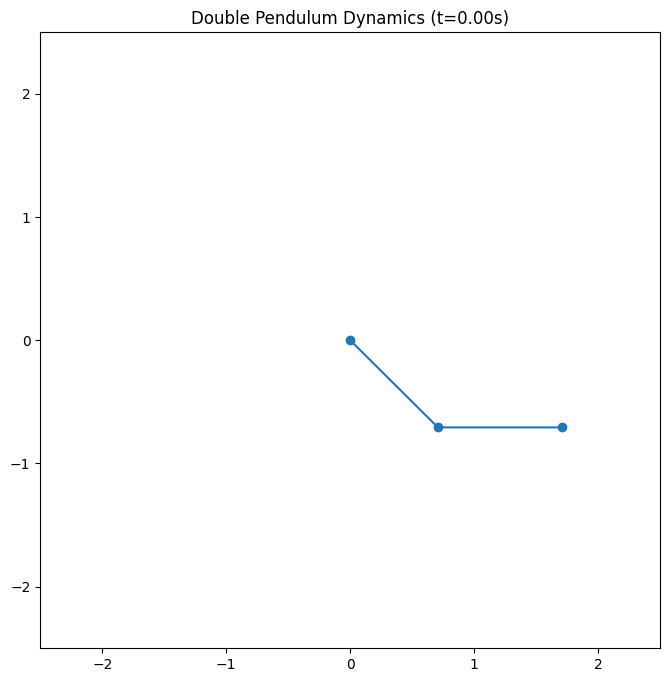

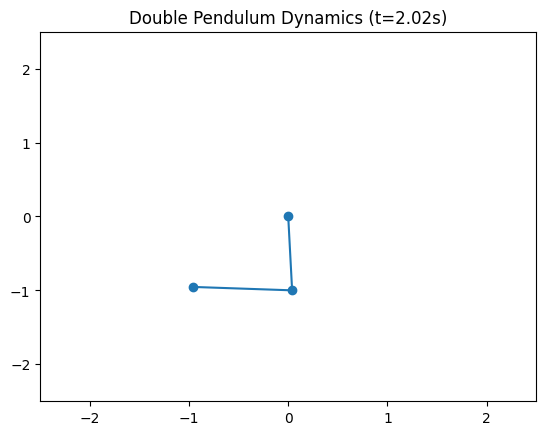

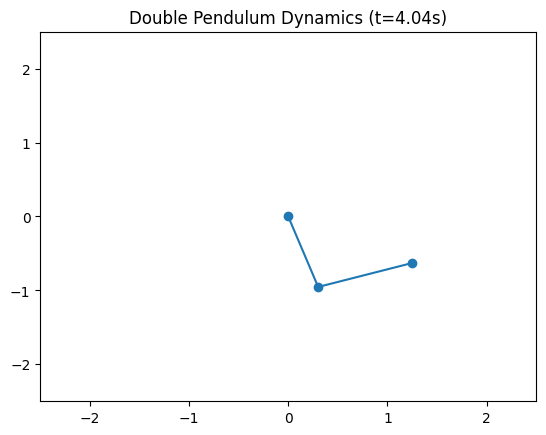

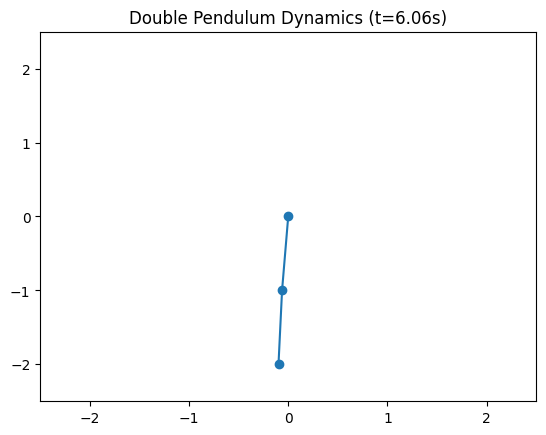

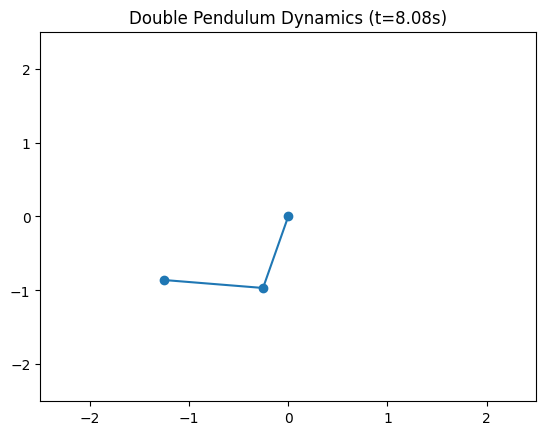

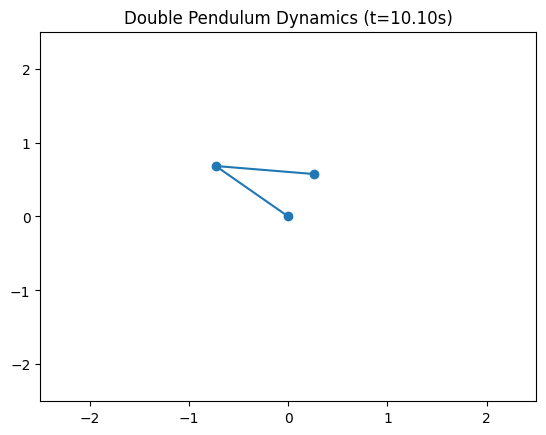

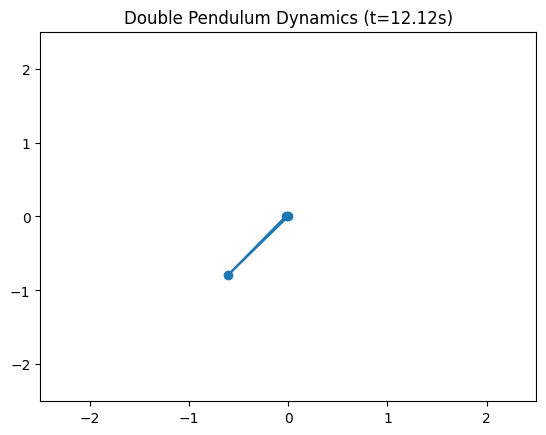

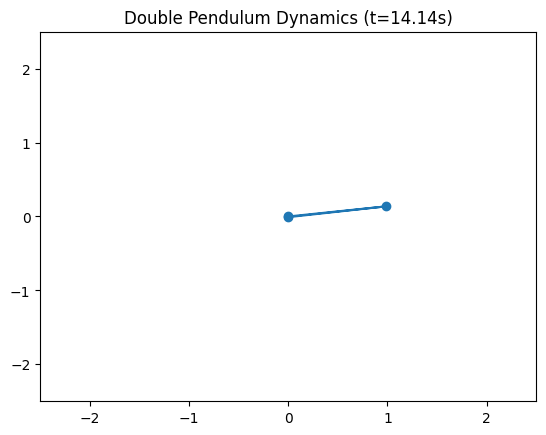

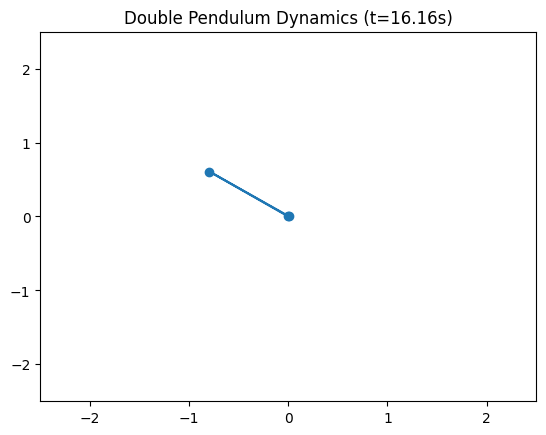

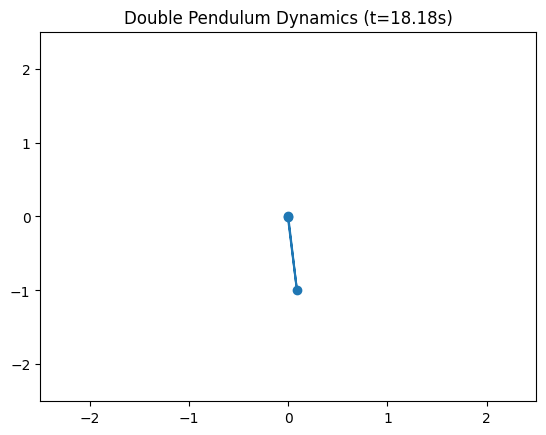

In [10]:
#task 2 c
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


m1, m2 = 1.0, 1.0  
L1, L2 = 1.0, 1.0  
g = 9.81  


def equations(t, y):
    theta1, theta2, p1, p2 = y

    
    delta = theta2 - theta1
    denom1 = m1 + m2 * np.sin(delta)**2
    denom2 = L1 * denom1

    
    dtheta1 = (p1 * L2 - p2 * L1 * np.cos(delta)) / (L1**2 * L2 * denom1)
    dtheta2 = (p2 * L1 - p1 * L2 * np.cos(delta)) / (L1 * L2**2 * denom1)

    
    dp1 = -m2 * L1 * L2 * dtheta1 * dtheta2 * np.sin(delta) - (m1 + m2) * g * L1 * np.sin(theta1)
    dp2 = m2 * L1 * L2 * dtheta1 * dtheta2 * np.sin(delta) - m2 * g * L2 * np.sin(theta2)

    return [dtheta1, dtheta2, dp1, dp2]


initial_conditions = [
    np.pi / 4,  # theta1 (initial angle for the first pendulum)
    np.pi / 2,  # theta2 (initial angle for the second pendulum) 
    0.0,        # p1 (initial momentum for the first pendulum) 
    0.0         # p2 (initial momentum for the second pendulum) 
]

#time span
t_span = (0, 20)  
t_eval = np.linspace(*t_span, 100)  

#solves the system
def solve_pendulum():
    return solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval, method='RK45')

solution = solve_pendulum()

#extracts the solutions
t = solution.t
theta1, theta2, p1, p2 = solution.y

#converts to cartesian 
def to_cartesian(theta1, theta2):
    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)
    return x1, y1, x2, y2

x1, y1, x2, y2 = to_cartesian(theta1, theta2)

#plot phase space trajectory 
plt.figure(figsize=(10, 5))
plt.plot(theta2, p2, label="Phase Space (\u03B82 vs p2)")
plt.xlabel("\u03B82 (Angle of second pendulum)")
plt.ylabel("p2 (Momentum of second pendulum)")
plt.title("Phase Space Trajectory")
plt.grid()
plt.legend()
plt.show()

#plot dynamics in real space
plt.figure(figsize=(8, 8))
for i in range(0, len(t), 10):  
    plt.clf()
    plt.plot([0, x1[i], x2[i]], [0, y1[i], y2[i]], marker='o')
    plt.xlim(-L1 - L2 - 0.5, L1 + L2 + 0.5)
    plt.ylim(-L1 - L2 - 0.5, L1 + L2 + 0.5)
    plt.title(f"Double Pendulum Dynamics (t={t[i]:.2f}s)")
    plt.pause(0.01)

plt.show()
